# PageRank

<h3>
<b>
Benyamin Maleki
</b>
</h3>


In this problem, you have to implement PageRank algorithm to rank papers based on their references.

PageRank is a link analysis algorithm and it assigns a numerical weighting to each element of a hyperlinked set of documents, such as the World Wide Web, with the purpose of "measuring" its relative importance within the set. The algorithm may be applied to any collection of entities with reciprocal quotations and references.

It's recommended to have a look at the following sources to get more familiar with PageRank:

[https://en.wikipedia.org/wiki/PageRank](https://en.wikipedia.org/wiki/PageRank)

[https://towardsdatascience.com/pagerank-3c568a7d2332](https://towardsdatascience.com/pagerank-3c568a7d2332)

## Dataset
You are given a number of papers in Computer Science field, which are crawled from [Semantic Scholar](https://www.semanticscholar.org/). Each paper has Id, title, references, etc. You can download the dataset from here. For your convenience, we have considered only a limited number of references for each paper.


## Hint
Each paper is a node in the graph. Paper A links to paper B if and only if B is in A's references. (Similary, we have a directed edge from A to B.) Note that some papers may not have any input or output edge. Don't forget to consider such papers as well.

### Using libraries such as networkx is not allowed (Except in the last part). You have to implement PageRank from scratch. Feel free to add cells when needed.   


## Download data, import dependencies

In [ ]:
# Download resources https://drive.google.com/drive/folders/1GvUc06eKX2Knf3JP5RCvIJjUkIjE2fTu?usp=share_link
!mkdir -p resources
%cd ./resources
!gdown 1C9l4uWzABZomkZQdAMxETz-b12PcOzBv # clean_data.json
%cd ..

/content/resources
Downloading...
From: https://drive.google.com/uc?id=1C9l4uWzABZomkZQdAMxETz-b12PcOzBv
To: /content/resources/clean_data.json
100% 23.3M/23.3M [00:00<00:00, 54.5MB/s]
/content


In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import json
import networkx as nx
import requests
from time import sleep
tqdm.pandas()

In [2]:
df = pd.read_json('resources/clean_data.json')
print(df.shape)
df.head()

(7136, 8)


,paperId,title,abstract,year,referenceCount,citationCount,authors,k_references
0,63d8426ba1f51a8525dd19fd8ec92934ec71aea5,A Survey of Data Augmentation Approaches for NLP,Data augmentation has recently seen increased ...,2021,196,117,"[{'authorId': '152913678', 'name': 'Steven Y. ...",[{'paperId': '00ea88920eca898909bd8dd455df25ec...
1,33ec7eb2168e37e3007d1059aa96b9a63254b4da,Beyond Accuracy: Behavioral Testing of NLP Mod...,Although measuring held-out accuracy has been ...,2020,33,386,"[{'authorId': '78846919', 'name': 'Marco Tulio...",[{'paperId': '05dd7254b632376973f3a1b4d39485da...
2,642038c7a49caa9f0ac5b37b01fab5b2b8d981d5,ERASER: A Benchmark to Evaluate Rationalized N...,State-of-the-art models in NLP are now predomi...,2019,75,217,"[{'authorId': '48727916', 'name': 'Jay DeYoung...",[{'paperId': '0754982927fa07a6689fb0f2cbeb8e3d...
3,58ed1fbaabe027345f7bb3a6312d41c5aac63e22,Retrieval-Augmented Generation for Knowledge-I...,Large pre-trained language models have been sh...,2020,71,339,"[{'authorId': '145222654', 'name': 'Patrick Le...",[{'paperId': '016368185723d0ec99aafa4b59273005...
4,d47a682723f710395454687319bb55635e653105,Language (Technology) is Power: A Critical Sur...,We survey 146 papers analyzing “bias” in NLP s...,2020,238,324,"[{'authorId': '3422038', 'name': 'Su Lin Blodg...",[{'paperId': '00059087c954c1af6ece33115315e3e0...


## PageRank
Implement PageRank from scratch!


*   Don't forget to consider the damping factor in your implementation.
*   Report number of nodes and number of edges of the constructed graph.
*   Identify the node with maximum number of input edges. Which paper corresponds to this node?
*   Report 10 most importatnt papers with PageRank.

See the most important paper according to PageRank. Recall that papers are in CS and NLP topics. What is your opinion about this paper? :)




$$ PR(P_i) = \frac{1-d}{n} + d\times\sum\limits_{P_j \in\ in(P_i)} \frac{PR(P_j)}{|out(P_j)|} $$
$$ \text{where: } $$
$$PR(P) = \text{PageRank of the Page}\ P$$ 
$$d = \text{damping factor}$$
$$P_j = j\text{-th Page} $$
$$in(v) = \text{set of Pages which}\ v\ \text{has an edge from them}$$
$$out(v) = \text{set of Pages which}\ v\ \text{has an edge to them}$$ 


In [129]:
### Creating a graph
class Node:
    def __init__(self, key):
        self.key = key
        self.pageRank = 1.0
        self.newPageRank = 1.0
        self.incoming = {}
        self.outgoing = {}
    
# Creating the dict of Pages (nodes)
paper_id = set(df['paperId'].values)
map_pages = {}
for p_id in paper_id:
    map_pages[p_id] = Node(p_id)
# Inserting relations of paperIds into their respective nodes
new_papers = set() # pages that are not in the dataset
for p_id in paper_id:
    curr_paper = df[df['paperId'] == p_id]
    curr_references_list = curr_paper['k_references'].values[0]
    curr_references = [curr_references_list[i]['paperId'] for i in range(len(curr_references_list))]
    for ref in curr_references:
        if ref not in map_pages: # ensuring that the reference is in the dataset
            new_papers.add(ref)
            map_pages[ref] = Node(ref)
        map_pages[p_id].outgoing[ref] = map_pages[ref]
        map_pages[ref].incoming[p_id] = map_pages[p_id]
        

# Adding new papers to set of paperIds
paper_id = paper_id.union(new_papers)

for node in map_pages.values():
    node.pageRank = 1/len(map_pages)
    node.newPageRank = 1/len(map_pages)

count_edges = 0
for node in map_pages.values():
    count_edges += len(node.outgoing)
    
print('Number of nodes: ', len(map_pages))
print('Number of edges: ', count_edges)

Number of nodes:  40203
Number of edges:  62510


In [130]:
## Identifying the node which has been referenced the most
max_incoming = 0
max_incoming_node = None
for p_id in paper_id:
    if len(map_pages[p_id].incoming) > max_incoming:
        max_incoming = len(map_pages[p_id].incoming)
        max_incoming_node = map_pages[p_id]
print('Node with most incoming edges: ', max_incoming_node.key)
print('Number of incoming edges: ', max_incoming)
print('Title: ', df[df['paperId'] == max_incoming_node.key]['title'].values[0] if len(df[df['paperId'] == max_incoming_node.key]['title'].values) > 0 else 'TITLE NOT FOUND')

Node with most incoming edges:  204e3073870fae3d05bcbc2f6a8e263d9b72e776
Number of incoming edges:  517
Title:  TITLE NOT FOUND


In [131]:
# Metadata
damping_factor = 0.85
N = len(map_pages)
dangling_nodes = []
for p_id in map_pages:
    node = map_pages[p_id]
    if len(node.outgoing) == 0:
        dangling_nodes.append(node)

## One iteration of the whole graph for updating the pageRank
def update_pageRank_one_iteration(map_pages):  
    # calculating dangling nodes term
    dangling_summation = 0
    for node in dangling_nodes:
        dangling_summation += node.pageRank
    dangling_summation /= N  # normalization of summation
    # updating based on current pageRank
    for p_id in map_pages:
        curr_node = map_pages[p_id]
        sum_incoming = sum([map_pages[parent].pageRank / len(map_pages[parent].outgoing) for parent in curr_node.incoming])
        curr_node.newPageRank = (1 - damping_factor)/N + damping_factor*(sum_incoming + dangling_summation)
    # changing the pageRank of all papers to the new value
    for p_id in map_pages:
        map_pages[p_id].pageRank = map_pages[p_id].newPageRank

In [132]:
## Running multiple iterations
# Also testing the convergence by storing the pageRank of some nodes
sample_size = 10
convergence_test_set = np.random.choice(list(map_pages.keys()), sample_size, replace=False)
iterations = 100
page_rank_by_time = {p_id: [] for p_id in convergence_test_set}
# Store the initial pageRank of the sample nodes in test set
for p_id in convergence_test_set:
    page_rank_by_time[p_id].append(map_pages[p_id].pageRank)
# Actual iteration
for i in range(iterations):
    update_pageRank_one_iteration(map_pages)
    # Store the pageRank of the sample nodes in test set
    for p_id in convergence_test_set:
        page_rank_by_time[p_id].append(map_pages[p_id].pageRank)


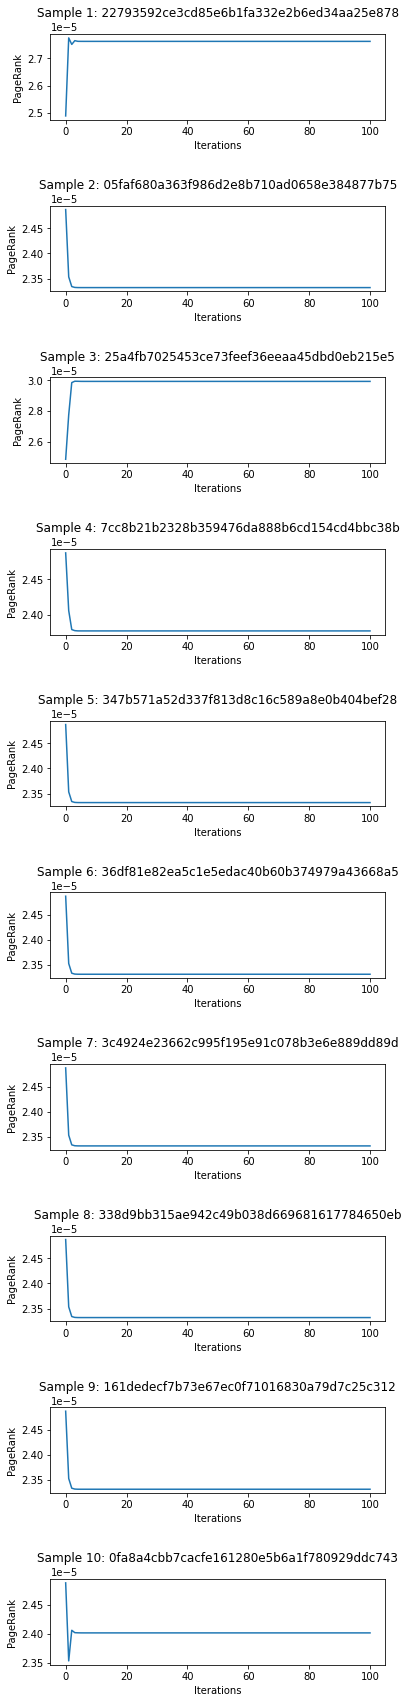

In [133]:
######## EXTRA CELL - Testing the convergence!
# Plotting the convergence separately
import matplotlib.pyplot as plt
fig, axs = plt.subplots(sample_size, 1, figsize=(6, sample_size*3))
for i, p_id in enumerate(convergence_test_set):
    axs[i].plot(page_rank_by_time[p_id])
    axs[i].set_title(f'Sample {i+1}: {p_id}')
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('PageRank')
fig.subplots_adjust(hspace=1)

plt.show()

In [134]:
### Reporting the top 10 papers
top_10 = sorted(map_pages.items(), key=lambda x: x[1].pageRank, reverse=True)[:10]
print('Top 10 papers:')
for i, (p_id, node) in enumerate(top_10):
    # print the title of the paper
    title = df[df['paperId'] == p_id]['title'].values
    if len(title) != 0:
        title = title[0]
    else:
        title = 'TITLE NOT FOUND'
    print(f'{i+1}. \"{title}\": (paperId:{p_id}), (PageRank: {node.pageRank})')



Top 10 papers:
1. "TITLE NOT FOUND": (paperId:204e3073870fae3d05bcbc2f6a8e263d9b72e776), (PageRank: 0.0010905550446855085)
2. "TITLE NOT FOUND": (paperId:0b44fcbeea9415d400c5f5789d6b892b6f98daff), (PageRank: 0.0006834236404475606)
3. "TITLE NOT FOUND": (paperId:05dd7254b632376973f3a1b4d39485da17814df5), (PageRank: 0.0005028144203513907)
4. "TITLE NOT FOUND": (paperId:0b544dfe355a5070b60986319a3f51fb45d1348e), (PageRank: 0.00048412931520371114)
5. "RoBERTa: A Robustly Optimized BERT Pretraining Approach": (paperId:077f8329a7b6fa3b7c877a57b81eb6c18b5f87de), (PageRank: 0.000483872728132432)
6. "TITLE NOT FOUND": (paperId:44d2abe2175df8153f465f6c39b68b76a0d40ab9), (PageRank: 0.00047691507237220015)
7. "TITLE NOT FOUND": (paperId:1af68821518f03568f913ab03fc02080247a27ff), (PageRank: 0.0004088792471354884)
8. "TITLE NOT FOUND": (paperId:330da625c15427c6e42ccfa3b747fb29e5835bf0), (PageRank: 0.0003885274687027834)
9. "TITLE NOT FOUND": (paperId:2c03df8b48bf3fa39054345bafabfeff15bfd11d), (PageR

## Networkx
Implement PageRank with networkx. Report previous items and compare the results with your implementation. Explain if there is any differrence.

EXPLANATION: 
<p>
The reason that networkx and my implementation of PageRank algorithm have slightly different results is the precision at which networkx stops the power iteration.
</p>
<p>
At first, the precision of networkx's algorithm was 1e-6 and the difference of results was more noticeable (in fact networkx would rank RoBERTa fourth). But, after assigning a smaller value for networkx's precision, its results were much more similar to mine.   
</p>
<p>
Also, the dangling term I used in the PageRank iterative update statement, was an adaption from networkx source code, as I was trying to make my results more similar to the library's approach. This term only distributes, evenly, the PageRank of dangling nodes to all of the nodes in the graph.

In [135]:
##### PageRank using NetworkX
# Creating the graph
G = nx.DiGraph()
# Nodes
for p_id in paper_id:
    G.add_node(p_id)
# Edges
for p_id in paper_id:
    curr_paper = df[df['paperId'] == p_id]
    curr_references_dicts = curr_paper['k_references'].values
    if len(curr_references_dicts) != 0:
        curr_references_dicts = curr_references_dicts[0]
        curr_references = [curr_references_dicts[i]['paperId'] for i in range(len(curr_references_dicts))]
        for ref in curr_references:
            if ref not in paper_id:
               G.add_node(ref)
            G.add_edge(p_id, ref)


# Number of nodes and edges
print('Number of nodes: ', G.number_of_nodes())
print('Number of edges: ', G.number_of_edges())


Number of nodes:  40203
Number of edges:  62510


In [136]:
# Node with most incoming edges
max_incoming = 0
max_incoming_node = None
for p_id in paper_id:
    if len(G.in_edges(p_id)) > max_incoming:
        max_incoming = len(G.in_edges(p_id))
        max_incoming_node = p_id
print('Node with most incoming edges: ', max_incoming_node)
print('Number of incoming edges: ', max_incoming)
title_cell = df[df['paperId'] == max_incoming_node]['title'].values
print('Title: ', title_cell[0] if len(title_cell) > 0 else 'TITLE NOT FOUND')

Node with most incoming edges:  204e3073870fae3d05bcbc2f6a8e263d9b72e776
Number of incoming edges:  517
Title:  TITLE NOT FOUND


In [137]:
# PageRank
nx_pagerank = nx.pagerank(G, alpha=0.85, tol=1e-7)
top_10 = sorted(nx_pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print('Top 10 papers:')
for i, (p_id, node) in enumerate(top_10):
    # print the title of the paper
    title = df[df['paperId'] == p_id]['title'].values
    if len(title) != 0:
        title = title[0]
    else:
        title = 'TITLE NOT FOUND'
    print(f'{i+1}. \"{title}\": (paperId:{p_id}), (PageRank: {nx_pagerank[p_id]})')


Top 10 papers:
1. "TITLE NOT FOUND": (paperId:204e3073870fae3d05bcbc2f6a8e263d9b72e776), (PageRank: 0.0010916464335974203)
2. "TITLE NOT FOUND": (paperId:0b44fcbeea9415d400c5f5789d6b892b6f98daff), (PageRank: 0.0006824007414970674)
3. "TITLE NOT FOUND": (paperId:05dd7254b632376973f3a1b4d39485da17814df5), (PageRank: 0.0005032947384721017)
4. "TITLE NOT FOUND": (paperId:0b544dfe355a5070b60986319a3f51fb45d1348e), (PageRank: 0.00048441544563854763)
5. "RoBERTa: A Robustly Optimized BERT Pretraining Approach": (paperId:077f8329a7b6fa3b7c877a57b81eb6c18b5f87de), (PageRank: 0.0004843542333230707)
6. "TITLE NOT FOUND": (paperId:44d2abe2175df8153f465f6c39b68b76a0d40ab9), (PageRank: 0.0004766839593327007)
7. "TITLE NOT FOUND": (paperId:1af68821518f03568f913ab03fc02080247a27ff), (PageRank: 0.0004089831278869254)
8. "TITLE NOT FOUND": (paperId:330da625c15427c6e42ccfa3b747fb29e5835bf0), (PageRank: 0.0003889956961980335)
9. "TITLE NOT FOUND": (paperId:2c03df8b48bf3fa39054345bafabfeff15bfd11d), (PageR

## Utils
Below is the main function we used to get the papers, in case you were wondering. You may want to use it to get more information about the papers.

In [ ]:
# fields are separated by ",". For more information see https://api.semanticscholar.org/api-docs/graph
def request_papers_by_id(IDs, fields='title,url,year,fieldsOfStudy,citationCount,referenceCount'):
    papers = []
    for id in tqdm(IDs):
        response = requests.get(f'https://api.semanticscholar.org/graph/v1/paper/{id}?fields={fields}')
        js = response.json()
        papers.append(js)
        # sleep(3.1)
    return papers